In [1]:
import requests
import lxml.html as lh
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
website_url = requests.get('https://www.basketball-reference.com/leagues/NBA_2019_per_game.html')
soup = BeautifulSoup(website_url.content,'lxml')
soup.prettify()
My_table = soup.find('table',{'id':"per_game_stats"})

In [3]:
tabledata = My_table.findAll('td')
data = []
for cell in tabledata:
    data.append(cell.get_text())
    
#print(data)

In [4]:
import numpy as np
data2 = np.array(data)
refined = np.reshape(data2, (-1, 29))
#refined

In [5]:
tableheader = My_table.findAll('th')
headers = []
count = 0
for item in tableheader:
    if (count < 30):
        headers.append(item.get_text())
        count=count+1
headers.remove('Rk')    
print(headers)

['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


In [6]:
import pandas as pd
df1 = pd.DataFrame(refined, columns=headers)
df1.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Alex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


In [7]:
df1 = df1.set_index('Player')
df2 = df1.copy(deep=True)
df2 = df2.drop(['Tm','Pos'], axis=1)
#df2 = df2.set_index('Player')
df2.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Alex Abrines,25,31,2,19.0,1.8,5.1,.357,1.3,4.1,.323,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
Quincy Acy,28,10,0,12.3,0.4,1.8,.222,0.2,1.5,.133,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
Jaylen Adams,22,34,1,12.6,1.1,3.2,.345,0.7,2.2,.338,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
Steven Adams,25,80,80,33.4,6.0,10.1,.595,0.0,0.0,.000,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
Bam Adebayo,21,82,28,23.3,3.4,5.9,.576,0.0,0.2,.200,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


In [8]:
df2.columns

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
df2.dropna()
cols = df2.columns
sc2 = StandardScaler()
for col in cols:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    df2[[col]] = sc2.fit_transform(df2[[col]])

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

In [10]:
df2['Pos'] = df1['Pos']
dum1 = pd.get_dummies(df2['Pos'])
df2 = pd.concat([df2, dum1], axis=1)
df2 = df2.drop(['Pos'], axis=1)

In [11]:
df2.columns

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'C', 'C-PF', 'PF', 'PF-C', 'PF-SF',
       'PG', 'SF', 'SF-SG', 'SG', 'SG-PF', 'SG-SF'],
      dtype='object')

In [12]:
df2['C-PF'] = df2['C-PF'] + df2['PF-C']
df2 = df2.drop(['PF-C'], axis=1)
df2['SF-SG'] = df2['SF-SG'] + df2['SG-SF']
df2 = df2.drop(['SG-SF'], axis=1)
df2 = df2[df2['C-PF']<2]
df2 = df2[df2['SF-SG']<2]
df2.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,PTS,C,C-PF,PF,PF-SF,PG,SF,SF-SG,SG,SG-PF
Player,,,,,,,,,,,,,,,,,,,,,
Alex Abrines,-0.276120,-0.452445,-0.690679,-0.029415,-0.610874,-0.406331,-0.730545,0.527525,0.748903,0.057008,...,-0.529581,0,0,0,0,0,0,0,1,0
Quincy Acy,0.448823,-1.252034,-0.768077,-0.772413,-1.272837,-1.157518,-1.958725,-0.867979,-0.514575,-1.304655,...,-1.147704,0,0,1,0,0,0,0,0,0
Jaylen Adams,-1.001064,-0.338218,-0.729378,-0.739144,-0.941855,-0.838832,-0.839716,-0.233659,-0.174408,0.164508,...,-0.890153,0,0,0,0,1,0,0,0,0
Steven Adams,-0.276120,1.413264,2.327845,1.567474,1.375017,0.731832,1.434691,-1.121707,-1.243504,-2.257819,...,0.947047,1,0,0,0,0,0,0,0,0
Bam Adebayo,-1.242712,1.489416,0.315496,0.447434,0.145656,-0.224224,1.261836,-1.121707,-1.146313,-0.824490,...,0.088542,1,0,0,0,0,0,0,0,0


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


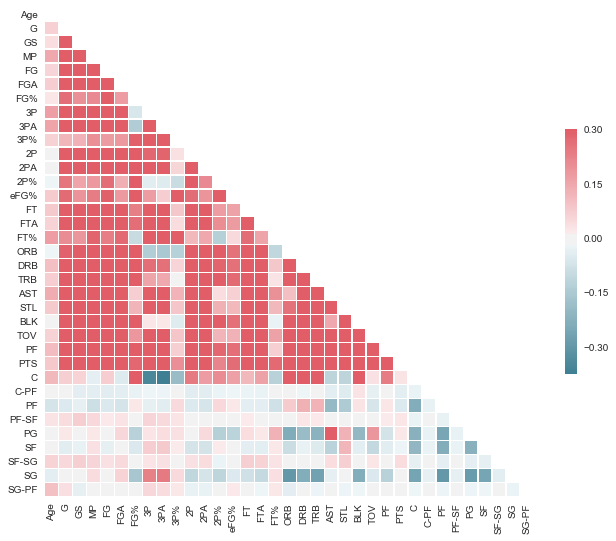

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D 

sns.set(style="white")

d = df2

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

## Data Clustering

In [14]:
def plot_embedding(X, y, title=None, num=10):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure(figsize=(18, 9))
    plt.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/num))
    
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [15]:
def plot_embedding3d(X, y, title=None):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure()
    
    ax = Axes3D(plt.figure(), rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/10.))
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    if title is not None:
        plt.title(title)
    plt.show()

In [16]:
df3 = df2.drop(['C', 'C-PF', 'PF', 'PF-SF', 'PG','SF', 'SF-SG', 'SG', 'SG-PF'], axis=1)

In [17]:
df3 = df3.dropna()

In [18]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
subSpace = TSNE().fit_transform(df3.values)
#subSpace = PCA().fit_transform(df3.values)

### K-Means

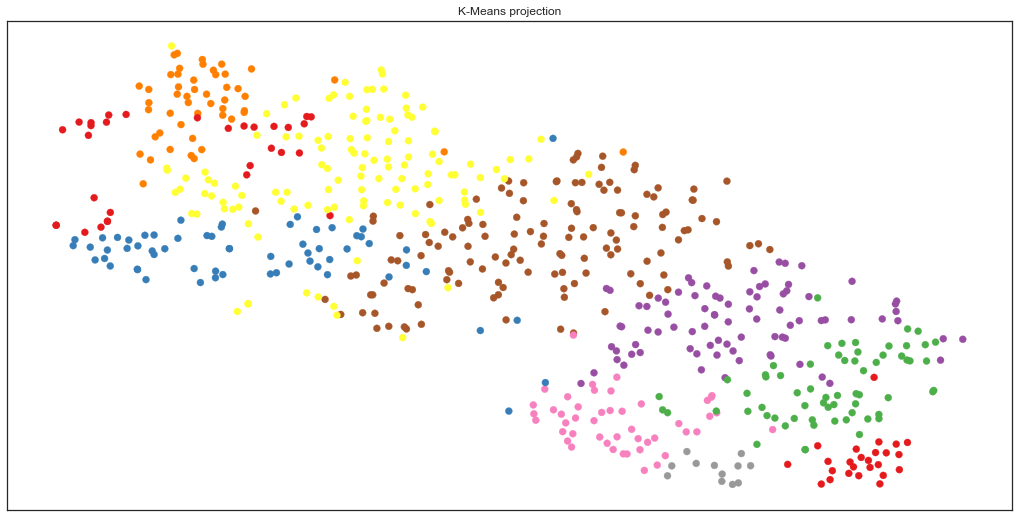

In [19]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=10, max_iter= 10000, n_init=100).fit(df3.values)
plot_embedding(subSpace, cluster.labels_, 'K-Means projection',10)

In [20]:
df4 = df3.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,label
Player,,,,,,,,,,,,,,,,,,,,,
Alex Abrines,-0.276120,-0.452445,-0.690679,-0.029415,-0.610874,-0.406331,-0.730545,0.527525,0.748903,0.057008,...,1.278766,-0.806685,-0.716245,-0.827380,-0.752226,-0.260932,-0.440027,-0.713050,-0.529581,6
Quincy Acy,0.448823,-1.252034,-0.768077,-0.772413,-1.272837,-1.157518,-1.958725,-0.867979,-0.514575,-1.304655,...,-0.276355,-0.676911,-0.288221,-0.425221,-0.630369,-1.211976,0.076622,-0.846712,-1.147704,5
Jaylen Adams,-1.001064,-0.338218,-0.729378,-0.739144,-0.941855,-0.838832,-0.839716,-0.233659,-0.174408,0.164508,...,0.267589,-0.676911,-0.716245,-0.706732,0.039844,-0.498693,-0.698351,-0.312066,-0.890153,6
Steven Adams,-0.276120,1.413264,2.327845,1.567474,1.375017,0.731832,1.434691,-1.121707,-1.243504,-2.257819,...,-1.671084,5.292664,0.995851,2.389894,-0.142941,2.116676,1.626566,0.890888,0.947047,8
Bam Adebayo,-1.242712,1.489416,0.315496,0.447434,0.145656,-0.224224,1.261836,-1.121707,-1.146313,-0.824490,...,-0.032278,1.529236,1.370372,1.505143,0.222630,0.690111,1.109918,0.623565,0.088542,8


In [21]:
name = 'LeBron James'
labnum = df4[df4.index == name].iloc[0].label
df4[df4['label'] == labnum]

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,label
Player,,,,,,,,,,,,,,,,,,,,,
Bradley Beal,-0.276120,1.489416,2.405244,1.955607,2.935359,2.894341,0.342975,2.049892,2.303951,0.257674,...,0.476798,0.361276,0.621330,0.580177,2.233271,2.116676,0.851594,2.227503,2.955947,0
Devin Booker,-1.001064,0.804053,1.708661,1.744906,2.888076,2.894341,0.270194,1.542436,1.915189,0.078508,...,0.881269,-0.287591,0.407318,0.218234,3.025341,0.690111,-0.440027,4.098765,3.127648,0
Jimmy Butler,0.690471,-1.252034,-0.381087,1.866891,2.036980,2.006574,0.306585,1.034981,0.943284,0.451173,...,0.330351,1.010143,0.460821,0.660609,1.502129,4.256523,1.626566,0.489903,2.217633,0
Mike Conley,1.173767,1.032507,1.940855,1.578564,1.847848,2.074864,0.006363,1.669300,1.720808,0.350840,...,0.734822,-0.287591,0.032797,-0.063278,2.781627,1.641154,-0.181703,1.158211,2.183293,0
Stephen Curry,0.932119,0.994432,1.902156,1.611832,2.888076,2.848815,0.315683,5.348355,4.442143,0.874006,...,1.229951,-0.157818,1.049354,0.700825,2.050485,1.641154,0.076622,2.361165,3.247838,0
DeMar DeRozan,0.690471,1.299037,2.211748,1.733817,2.415245,2.325260,0.397561,-0.994843,-0.951932,-1.139822,...,0.630218,-0.157818,1.370372,0.982336,2.659770,1.165633,0.334946,2.093842,2.200463,0
Luka Doncic,-1.726008,1.108659,2.018253,1.434400,1.847848,2.188681,-0.093711,1.796164,2.206761,0.085674,...,-0.185698,0.491049,2.065912,1.706223,2.537913,1.165633,-0.181703,3.163134,2.200463,0
Kevin Durant,0.932119,1.337113,2.250447,1.700548,2.888076,2.461840,0.761466,1.161844,1.186260,0.272007,...,1.013768,-0.547138,1.691391,1.143200,2.476985,0.214589,1.884890,2.494826,3.024627,0
De'Aaron Fox,-1.242712,1.451340,2.366545,1.345684,1.469583,1.528546,0.188316,0.273797,0.165759,0.401007,...,-0.088067,-0.417364,0.246809,0.097586,3.329984,2.354437,0.593270,2.361165,1.530830,0


### Agglomerative Clustering

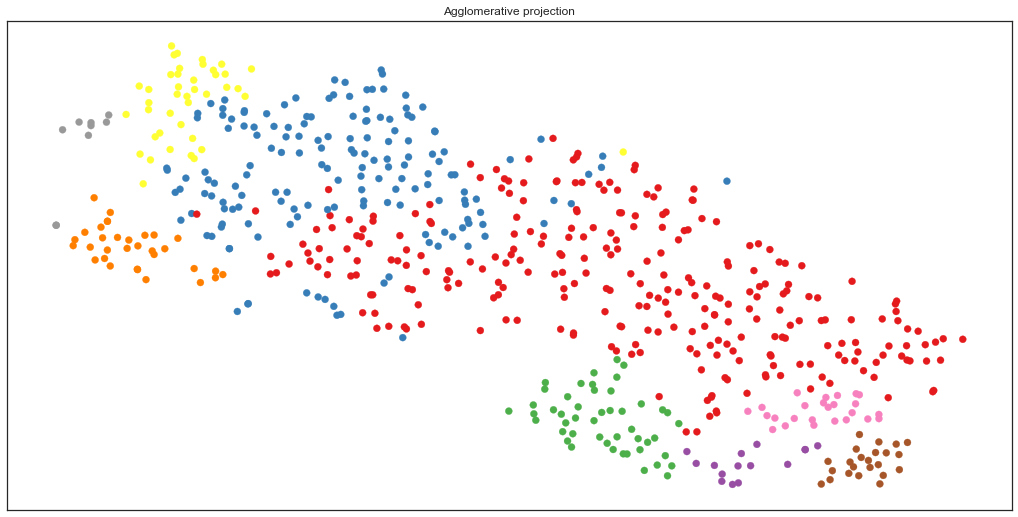

In [22]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10).fit(df3.values)
plot_embedding(subSpace, cluster.labels_, 'Agglomerative projection',10)

In [23]:
df4 = df3.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,label
Player,,,,,,,,,,,,,,,,,,,,,
Alex Abrines,-0.276120,-0.452445,-0.690679,-0.029415,-0.610874,-0.406331,-0.730545,0.527525,0.748903,0.057008,...,1.278766,-0.806685,-0.716245,-0.827380,-0.752226,-0.260932,-0.440027,-0.713050,-0.529581,2
Quincy Acy,0.448823,-1.252034,-0.768077,-0.772413,-1.272837,-1.157518,-1.958725,-0.867979,-0.514575,-1.304655,...,-0.276355,-0.676911,-0.288221,-0.425221,-0.630369,-1.211976,0.076622,-0.846712,-1.147704,6
Jaylen Adams,-1.001064,-0.338218,-0.729378,-0.739144,-0.941855,-0.838832,-0.839716,-0.233659,-0.174408,0.164508,...,0.267589,-0.676911,-0.716245,-0.706732,0.039844,-0.498693,-0.698351,-0.312066,-0.890153,2
Steven Adams,-0.276120,1.413264,2.327845,1.567474,1.375017,0.731832,1.434691,-1.121707,-1.243504,-2.257819,...,-1.671084,5.292664,0.995851,2.389894,-0.142941,2.116676,1.626566,0.890888,0.947047,3
Bam Adebayo,-1.242712,1.489416,0.315496,0.447434,0.145656,-0.224224,1.261836,-1.121707,-1.146313,-0.824490,...,-0.032278,1.529236,1.370372,1.505143,0.222630,0.690111,1.109918,0.623565,0.088542,3


In [24]:
name = 'LeBron James'
labnum = df4[df4.index == name].iloc[0].label
df4[df4['label'] == labnum]

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,label
Player,,,,,,,,,,,,,,,,,,,,,
Bradley Beal,-0.276120,1.489416,2.405244,1.955607,2.935359,2.894341,0.342975,2.049892,2.303951,0.257674,...,0.476798,0.361276,0.621330,0.580177,2.233271,2.116676,0.851594,2.227503,2.955947,7
Devin Booker,-1.001064,0.804053,1.708661,1.744906,2.888076,2.894341,0.270194,1.542436,1.915189,0.078508,...,0.881269,-0.287591,0.407318,0.218234,3.025341,0.690111,-0.440027,4.098765,3.127648,7
Mike Conley,1.173767,1.032507,1.940855,1.578564,1.847848,2.074864,0.006363,1.669300,1.720808,0.350840,...,0.734822,-0.287591,0.032797,-0.063278,2.781627,1.641154,-0.181703,1.158211,2.183293,7
Stephen Curry,0.932119,0.994432,1.902156,1.611832,2.888076,2.848815,0.315683,5.348355,4.442143,0.874006,...,1.229951,-0.157818,1.049354,0.700825,2.050485,1.641154,0.076622,2.361165,3.247838,7
Luka Doncic,-1.726008,1.108659,2.018253,1.434400,1.847848,2.188681,-0.093711,1.796164,2.206761,0.085674,...,-0.185698,0.491049,2.065912,1.706223,2.537913,1.165633,-0.181703,3.163134,2.200463,7
Kevin Durant,0.932119,1.337113,2.250447,1.700548,2.888076,2.461840,0.761466,1.161844,1.186260,0.272007,...,1.013768,-0.547138,1.691391,1.143200,2.476985,0.214589,1.884890,2.494826,3.024627,7
De'Aaron Fox,-1.242712,1.451340,2.366545,1.345684,1.469583,1.528546,0.188316,0.273797,0.165759,0.401007,...,-0.088067,-0.417364,0.246809,0.097586,3.329984,2.354437,0.593270,2.361165,1.530830,7
Paul George,0.448823,1.299037,2.211748,1.955607,2.888076,3.213027,0.006363,3.699124,3.518833,0.508507,...,0.692981,0.750596,2.172918,1.867087,1.380272,3.781002,0.076622,2.227503,3.368029,7
Blake Griffin,0.690471,1.222886,2.134350,1.744906,2.462528,2.507366,0.224706,2.049892,2.158165,0.336507,...,0.093248,0.620823,1.851900,1.585575,2.172342,0.214589,0.076622,3.163134,2.767076,7


#### This clustering excludes Jimmy Butler and Lou Williams from the "elite" category

### AffinityPropagation

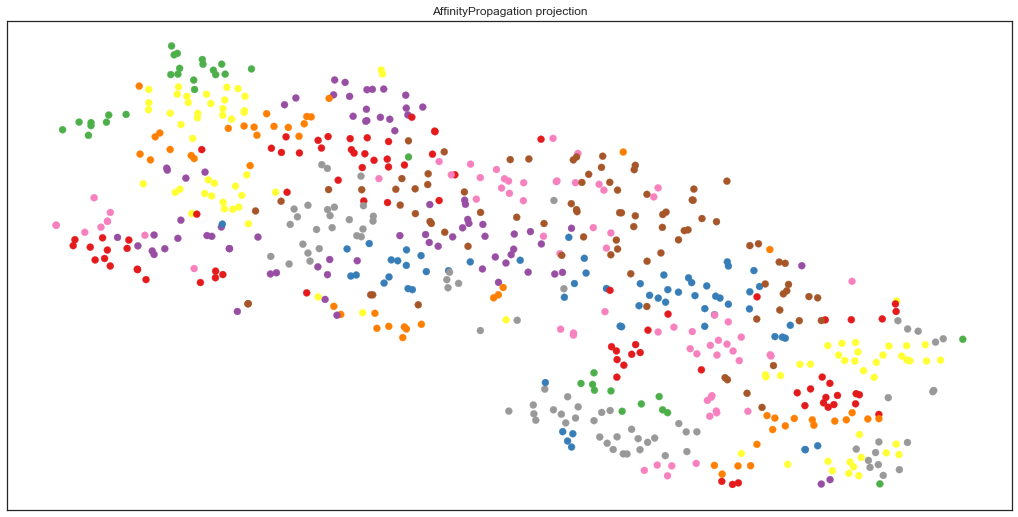

In [25]:
from sklearn.cluster import AffinityPropagation
cluster = AffinityPropagation(convergence_iter=15).fit(df3.values)
plot_embedding(subSpace, cluster.labels_, 'AffinityPropagation projection',45)

In [26]:
df4 = df3.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,label
Player,,,,,,,,,,,,,,,,,,,,,
Alex Abrines,-0.276120,-0.452445,-0.690679,-0.029415,-0.610874,-0.406331,-0.730545,0.527525,0.748903,0.057008,...,1.278766,-0.806685,-0.716245,-0.827380,-0.752226,-0.260932,-0.440027,-0.713050,-0.529581,30
Quincy Acy,0.448823,-1.252034,-0.768077,-0.772413,-1.272837,-1.157518,-1.958725,-0.867979,-0.514575,-1.304655,...,-0.276355,-0.676911,-0.288221,-0.425221,-0.630369,-1.211976,0.076622,-0.846712,-1.147704,29
Jaylen Adams,-1.001064,-0.338218,-0.729378,-0.739144,-0.941855,-0.838832,-0.839716,-0.233659,-0.174408,0.164508,...,0.267589,-0.676911,-0.716245,-0.706732,0.039844,-0.498693,-0.698351,-0.312066,-0.890153,0
Steven Adams,-0.276120,1.413264,2.327845,1.567474,1.375017,0.731832,1.434691,-1.121707,-1.243504,-2.257819,...,-1.671084,5.292664,0.995851,2.389894,-0.142941,2.116676,1.626566,0.890888,0.947047,37
Bam Adebayo,-1.242712,1.489416,0.315496,0.447434,0.145656,-0.224224,1.261836,-1.121707,-1.146313,-0.824490,...,-0.032278,1.529236,1.370372,1.505143,0.222630,0.690111,1.109918,0.623565,0.088542,45


In [27]:
name = 'Dirk Nowitzki'
labnum = df4[df4.index == name].iloc[0].label
df4[df4['label'] == labnum]

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,label
Player,,,,,,,,,,,,,,,,,,,,,
Marco Belinelli,1.415415,1.375189,-0.729378,0.414165,0.240222,0.413147,-0.221078,1.288708,1.186260,0.408174,...,1.139294,-0.806685,-0.234718,-0.425221,-0.082013,-0.498693,-0.698351,-0.178404,0.363264,22
Vince Carter,3.831894,1.260961,-0.419786,-0.195758,-0.232609,-0.155935,-0.166492,0.908117,0.797498,0.530007,...,-0.192672,-0.547138,-0.341724,-0.385005,-0.447584,-0.023172,0.076622,-0.579389,-0.169009,22
Jamal Crawford,2.865303,0.804053,-0.768077,-0.040505,-0.185326,-0.019355,-0.366640,0.146933,0.311545,0.121508,...,0.734822,-0.936458,-0.823251,-0.907812,1.075629,-0.260932,-0.440027,0.623565,-0.083159,22
Wayne Ellington,1.173767,-0.680899,-0.303689,0.225643,-0.138043,0.117224,-0.566787,1.796164,1.769403,0.379507,...,0.944032,-0.806685,-0.609239,-0.666516,-0.386655,0.927872,-0.698351,-0.579389,0.002692,22
Gerald Green,1.657063,1.146734,-0.768077,0.103659,0.051090,0.231041,-0.339347,1.542436,1.672213,0.279174,...,0.686007,-0.547138,-0.341724,-0.425221,-0.813155,-0.260932,0.076622,-0.312066,0.140053,22
Kyle Korver,2.623655,1.032507,-0.768077,-0.018326,-0.090760,0.003408,-0.193785,1.415572,1.186260,0.587340,...,0.574429,-0.936458,-0.288221,-0.505653,-0.386655,-0.498693,-0.440027,-0.312066,0.037032,22
Kyle Korver,2.623655,-1.023580,-0.768077,-0.395369,-0.421741,-0.474620,0.215609,0.908117,0.408736,1.060338,...,0.511666,-1.066231,-0.502233,-0.706732,-0.447584,-0.974215,-0.698351,0.088919,-0.272029,22
Kyle Korver,2.623655,0.423296,-0.768077,0.092569,0.003807,0.139988,-0.266566,1.542436,1.380641,0.494173,...,0.595350,-0.806685,-0.234718,-0.425221,-0.386655,-0.498693,-0.440027,-0.312066,0.122883,22
C.J. Miles,1.173767,0.385221,-0.729378,-0.339922,-0.469024,-0.224224,-0.703252,0.527525,0.603117,0.107174,...,0.616271,-0.806685,-0.662742,-0.706732,-0.691298,-0.260932,-0.181703,-0.579389,-0.340710,22


In [28]:
subSpace = TSNE(n_components=3).fit_transform(df3.values)

In [30]:
from sklearn.cluster import AffinityPropagation
cluster = AffinityPropagation(convergence_iter=15).fit(df3.values)
plot_embedding3d(subSpace, cluster.labels_, '3D AffinityPropagation projection')

NameError: name 'Axes3D' is not defined

<Figure size 432x288 with 0 Axes>